In [5]:
# conda base 

# Data manipulation 
import pandas as pd 
import numpy as np

# Data viz
import matplotlib.pyplot as plt 
import seaborn as sns

Without the "one-hot" encoding

In [6]:
# read the data 
df_metrics_all       = pd.read_csv("../results/training/regressor_comparison.csv")

# detect the dict objetcs 
df_metrics_all["top10_models"] = df_metrics_all["top10_models"].apply(lambda x: eval(x))

# split by plm 
df_metrics_bep       = df_metrics_all[df_metrics_all.model == "Bepler"] 
df_metrics_carp      = df_metrics_all[df_metrics_all.model == "CARP640M"]
df_metrics_esm       = df_metrics_all[df_metrics_all.model == "ESM"]
df_metrics_esm1b     = df_metrics_all[df_metrics_all.model == "ESM1b"]
df_metrics_esm1b_pca = df_metrics_all[df_metrics_all.model == "PCA_ESM1b"]
df_metrics_aac       = df_metrics_all[df_metrics_all.model == "aa_composition"]
df_metrics_t5        = df_metrics_all[df_metrics_all.model == "T5XLU50"]
df_metrics_t5_pca    = df_metrics_all[df_metrics_all.model == "PCA_T5XLU50"]
df_metrics_t5bfd     = df_metrics_all[df_metrics_all.model == "T5BFD"]
df_metrics_xlnet     = df_metrics_all[df_metrics_all.model == "XLNet"]

meta_df = [
    df_metrics_bep, df_metrics_carp, df_metrics_esm, df_metrics_esm1b, df_metrics_esm1b_pca,
    df_metrics_t5, df_metrics_t5_pca, df_metrics_t5bfd, df_metrics_xlnet
]

# remove aa_composition model (i.e. - 21 rows)
df_all = df_metrics_all[~df_metrics_all.index.isin(df_metrics_aac.index)]
df_all # 189 rows

,anti,best_model,rmse,mae,r2,pearson,pearson_p,spearman,spearman_p,data_size,train_size,test_size,top10_models,anti_lab,model,anti_class
0,Ceftriaxone,RandomForestRegressor,3.197483,2.303045,0.404644,0.738769,5.785833e-02,0.821429,2.344881e-02,33,26,7,"{'RandomForestRegressor': 3.197482972452653, '...",Ceftriaxone (33),Bepler,Cephalosporins
1,Moxalactam,MLPRegressor,1.508699,1.291713,0.499808,0.775826,4.033317e-02,0.684712,8.966645e-02,34,27,7,"{'MLPRegressor': 1.50869874376584, 'RandomFore...",Moxalactam (34),Bepler,Monobactams
2,Cefpirome,BayesianRidge,2.029322,1.513477,0.022764,0.583514,1.288931e-01,0.299407,4.712605e-01,39,31,8,"{'BayesianRidge': 2.029321922219595, 'SVR': 2....",Cefpirome (39),Bepler,Cephalosporins
3,Cefuroxime,PoissonRegressor,2.563381,1.889679,0.477810,0.692740,1.812888e-02,0.555651,7.594339e-02,53,42,11,"{'PoissonRegressor': 2.563380653375655, 'Ortho...",Cefuroxime (53),Bepler,Cephalosporins
4,Meropenem,KNeighborsRegressor,1.061672,0.890996,0.391829,0.636547,3.521767e-02,0.349683,2.918161e-01,53,42,11,"{'KNeighborsRegressor': 1.0616724590697946, 'P...",Meropenem (53),Bepler,Carbapenems
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Cefepime,ExtraTreeRegressor,1.894811,1.577146,0.591552,0.823955,7.493986e-07,0.588269,2.498262e-03,119,95,24,"{'ExtraTreeRegressor': 1.8948107412839132, 'Po...",Cefepime (119),XLNet,Cephalosporins
206,Aztreonam,SVR,5.273821,3.609706,-0.921831,0.653822,1.198553e-04,0.708995,1.668994e-05,141,112,29,"{'SVR': 2.98760408566907, 'NuSVR': 3.015224323...",Aztreonam (141),XLNet,Monobactams
207,Imipenem,BaggingRegressor,0.866997,0.727125,0.377417,0.646006,1.535695e-04,0.520546,3.792379e-03,143,114,29,"{'BaggingRegressor': 0.8669968505029069, 'KNei...",Imipenem (143),XLNet,Carbapenems
208,Cefotaxime,XGBRegressor,2.281795,1.772713,0.530819,0.755246,1.409362e-06,0.779901,3.764857e-07,150,120,30,"{'XGBRegressor': 2.281795483733071, 'RandomFor...",Cefotaxime (150),XLNet,Cephalosporins


# Best regressor 

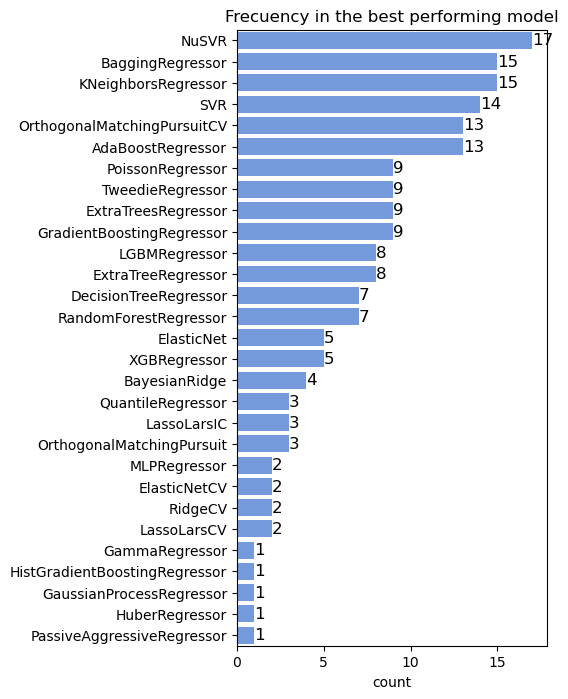

In [7]:
plt.figure(figsize=(4,8))
ax = sns.countplot(data = df_all, y = "best_model", color = "cornflowerblue", 
             order = pd.value_counts(df_all.best_model).index)
plt.ylabel("")
plt.xlabel("count")
plt.title("Frecuency in the best performing model")
ax.bar_label(ax.containers[0], size = 12); 

In [8]:
# take the top3 models and append it as a new col 
df_all["top3_models"] = df_all["top10_models"].apply(lambda x: dict(list(x.items())[:3]))

# create a list of keys 
keys_list = []

for ele in df_all["top3_models"]:
    keys_list.extend(list(ele.keys()))

# create a df and count frecs
df_top3 = pd.DataFrame({"keys": keys_list})
df_top3 = df_top3.groupby("keys").size().reset_index(name="frequency")
df_top3 = df_top3.sort_values("frequency", ascending = False).reset_index(drop = True)
df_top3.head()

/tmp/ipykernel_1002/392251779.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all["top3_models"] = df_all["top10_models"].apply(lambda x: dict(list(x.items())[:3]))


,keys,frequency
0,SVR,49
1,ExtraTreesRegressor,44
2,NuSVR,44
3,AdaBoostRegressor,34
4,KNeighborsRegressor,34


In [9]:
# the same but for top 10 models 
keys_list2 = []

for ele in df_all["top10_models"]:
    keys_list2.extend(list(ele.keys()))

df_top10 = pd.DataFrame({"keys": keys_list2})
df_top10 = df_top10.groupby("keys").size().reset_index(name="frequency")
df_top10 = df_top10.sort_values("frequency", ascending = False).reset_index(drop = True)
df_top10.head()

,keys,frequency
0,BayesianRidge,122
1,RandomForestRegressor,115
2,ExtraTreesRegressor,105
3,ElasticNetCV,97
4,NuSVR,95


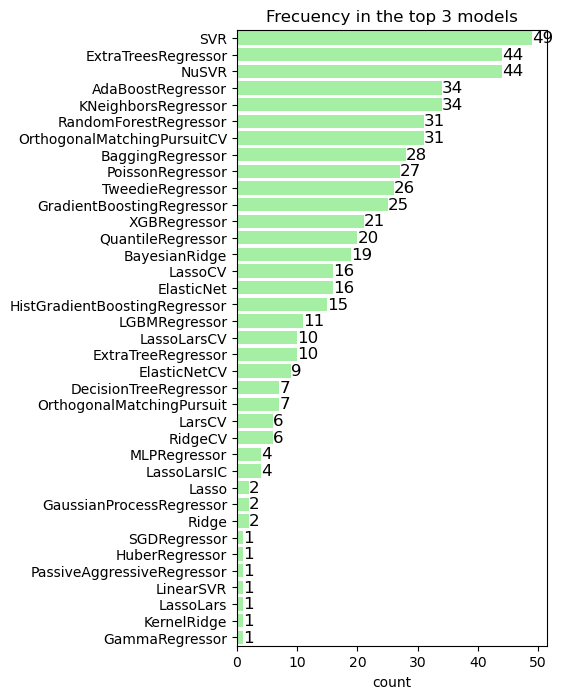

In [10]:
plt.figure(figsize=(4,8))
ax = sns.barplot(data = df_top3, x = "frequency", y = "keys", color = "palegreen")
plt.ylabel("")
plt.xlabel("count")
plt.title("Frecuency in the top 3 models")
ax.bar_label(ax.containers[0], size = 12);

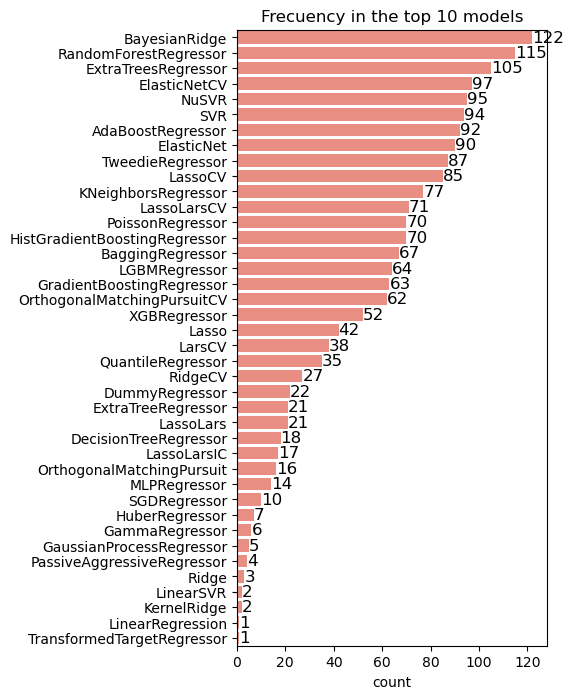

In [11]:
plt.figure(figsize=(4,8))
ax = sns.barplot(data = df_top10, x = "frequency", y = "keys", color = "salmon")
plt.ylabel("")
plt.xlabel("count")
plt.title("Frecuency in the top 10 models")
ax.bar_label(ax.containers[0], size = 12); 

In [12]:
df_all["model"].unique()

array(['Bepler', 'CARP640M', 'ESM', 'ESM1b', 'PCA_ESM1b', 'T5XLU50',
       'PCA_T5XLU50', 'T5BFD', 'XLNet'], dtype=object)

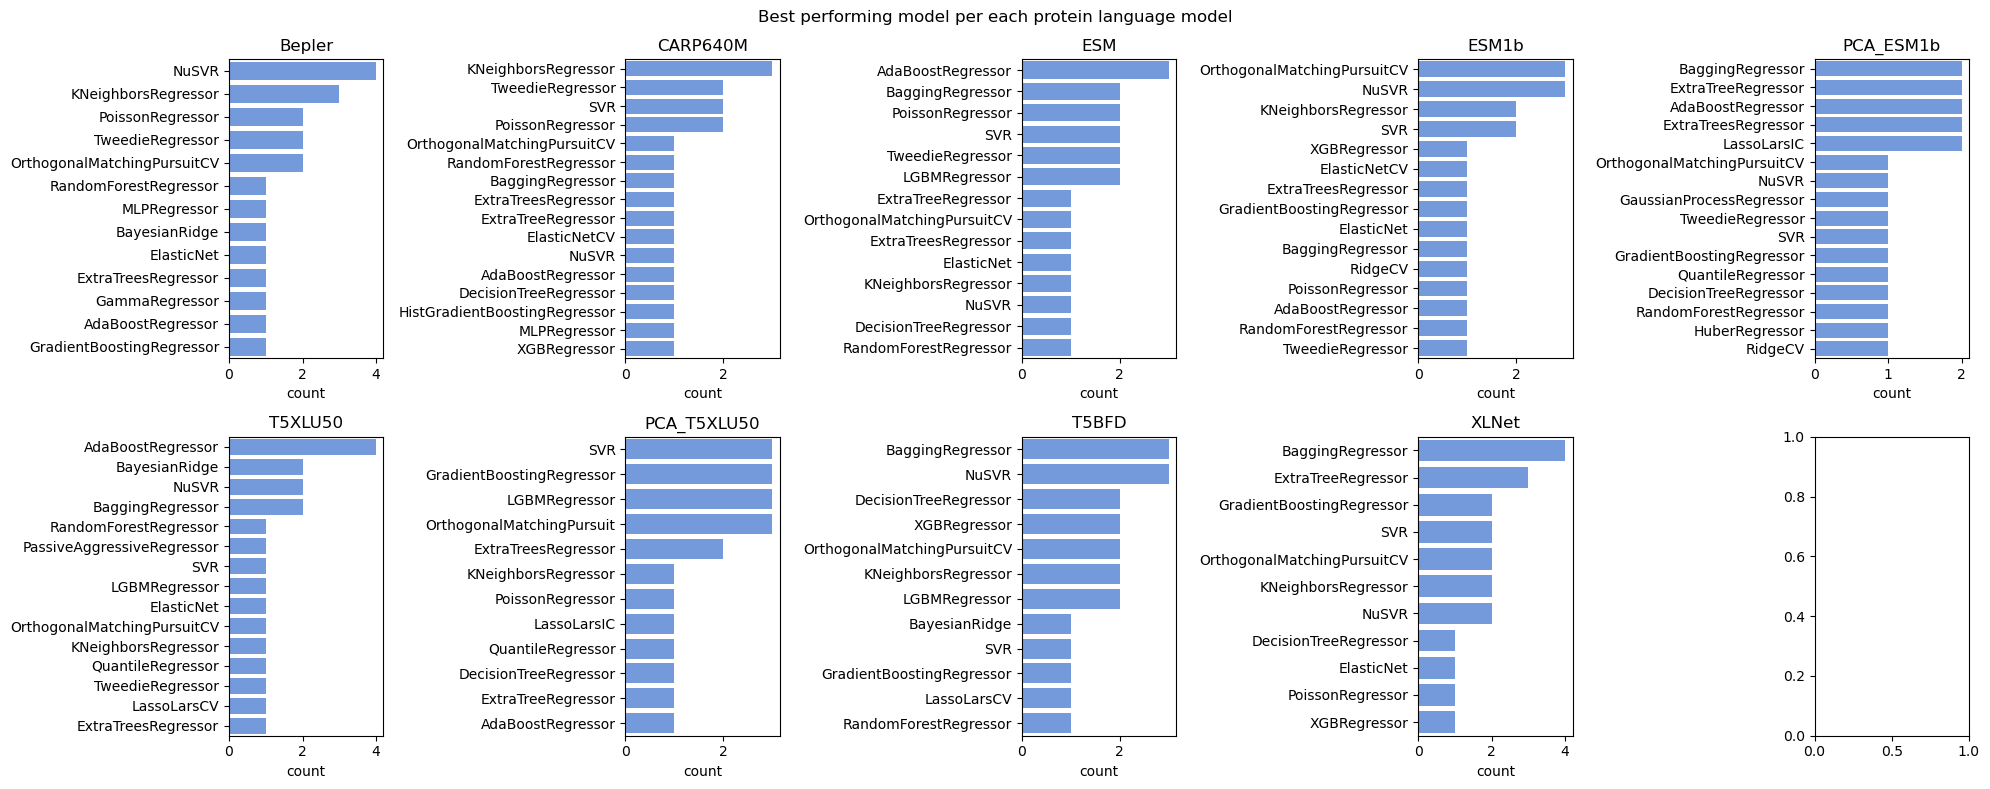

In [13]:
# create a plot of the most frecuent regressor per each plm
# list of unique plms 
model_names = df_all["model"].unique()

# set the fig composition
fig, axs = plt.subplots(ncols = 5, nrows = 2, figsize = (20,8))

for i, model in enumerate(model_names):

    # create the axis order
    row = i // 5
    col = i % 5
    ax = axs[row][col]
    
    # take the data of the corresponding pml
    data = df_all[df_all["model"] == model]
    
    # plot
    sns.countplot(data = data, y = "best_model", color = "cornflowerblue", ax = ax,
                  order = data["best_model"].value_counts().sort_values(ascending=False).index)
    ax.set_title(model)
    ax.set_ylabel("")
    plt.tight_layout()
    plt.suptitle("Best performing model per each protein language model")

# Best PLM

In [14]:
filter_pearson = []
for df in meta_df:
    print(f"{df.model.unique()} = {len(df[df.pearson > 0.5])}")
    filter_pearson.append(len(df[df.pearson > 0.5]))

['Bepler'] = 16
['CARP640M'] = 18
['ESM'] = 17
['ESM1b'] = 19
['PCA_ESM1b'] = 15
['T5XLU50'] = 15
['PCA_T5XLU50'] = 16
['T5BFD'] = 18
['XLNet'] = 18


In [15]:
# compute meand and standard error of pearson
mean_pearson = []
error_pearson = []
for df in meta_df:
    print(f"{df.model.unique()} = {df.pearson.mean()} +/- {df.pearson.sem()}")
    mean_pearson.append(df.pearson.mean())
    error_pearson.append(df.pearson.sem())

['Bepler'] = 0.6104581954673527 +/- 0.030975052368383542
['CARP640M'] = 0.6534699766236803 +/- 0.03640339387730311
['ESM'] = 0.6519670795934479 +/- 0.03271306777377635
['ESM1b'] = 0.6382816284901909 +/- 0.03201197781388761
['PCA_ESM1b'] = 0.5969100307750904 +/- 0.05518878650656312
['T5XLU50'] = 0.604922418169973 +/- 0.044420921830335955
['PCA_T5XLU50'] = 0.605856220177171 +/- 0.04632305567761261
['T5BFD'] = 0.6644995569983668 +/- 0.03700179192709682
['XLNet'] = 0.6478629825610868 +/- 0.04069882347805285


In [16]:
filter_spearman = []
for df in meta_df:
    print(f"{df.model.unique()} = {len(df[df.spearman > 0.5])}")
    filter_spearman.append(len(df[df.spearman > 0.5]))

['Bepler'] = 12
['CARP640M'] = 15
['ESM'] = 17
['ESM1b'] = 13
['PCA_ESM1b'] = 14
['T5XLU50'] = 13
['PCA_T5XLU50'] = 16
['T5BFD'] = 16
['XLNet'] = 17


In [17]:
mean_spearman = []
error_spearman = []

for df in meta_df:
    print(f"{df.model.unique()} = {df.spearman.mean()} +/- {df.spearman.sem()}")
    mean_spearman.append(df.spearman.mean())
    error_spearman.append(df.spearman.sem())

['Bepler'] = 0.5556810114564202 +/- 0.031173284908490244
['CARP640M'] = 0.6052916889779498 +/- 0.02896078458764064
['ESM'] = 0.6017465044703956 +/- 0.028960200925028597
['ESM1b'] = 0.5484219075071047 +/- 0.031981286144517486
['PCA_ESM1b'] = 0.5317532930472135 +/- 0.043185765318952206
['T5XLU50'] = 0.5395018056583645 +/- 0.049633045092298614
['PCA_T5XLU50'] = 0.5706278188464627 +/- 0.04032042701513246
['T5BFD'] = 0.6259756720567354 +/- 0.040613423957298875
['XLNet'] = 0.5960646949310506 +/- 0.03676846793593792


In [18]:
df_best_plm = pd.DataFrame()
df_best_plm["model"] = ["Bepler","CARP640M","ESM","ESM1b","PCA_ESM1b","T5XLU50","PCA_T5XLU50","T5BFD","XLNet"]
df_best_plm["times_pearson"]  = filter_pearson
df_best_plm["times_spearman"] = filter_spearman
df_best_plm["mean_pearson"]   = mean_pearson
df_best_plm["mean_spearman"]  = mean_spearman
df_best_plm["error_pearson"]   = error_pearson
df_best_plm["error_spearman"]  = error_spearman
df_best_plm.sort_values("mean_spearman")

,model,times_pearson,times_spearman,mean_pearson,mean_spearman,error_pearson,error_spearman
4,PCA_ESM1b,15,14,0.596910,0.531753,0.055189,0.043186
5,T5XLU50,15,13,0.604922,0.539502,0.044421,0.049633
3,ESM1b,19,13,0.638282,0.548422,0.032012,0.031981
0,Bepler,16,12,0.610458,0.555681,0.030975,0.031173
6,PCA_T5XLU50,16,16,0.605856,0.570628,0.046323,0.040320
8,XLNet,18,17,0.647863,0.596065,0.040699,0.036768
2,ESM,17,17,0.651967,0.601747,0.032713,0.028960
1,CARP640M,18,15,0.653470,0.605292,0.036403,0.028961
7,T5BFD,18,16,0.664500,0.625976,0.037002,0.040613


Text(0, 0.5, 'Mean Pearson correlation')

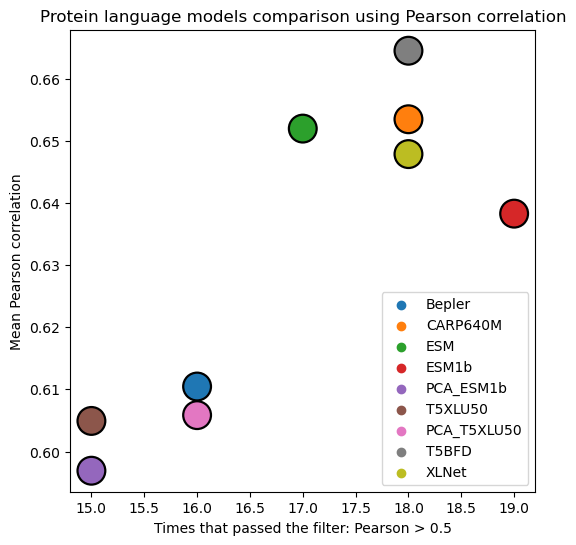

In [19]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data = df_best_plm, x = "times_pearson", y = "mean_pearson", hue = "model", s = 400, edgecolor = "black")
plt.legend(loc="lower right")
plt.title("Protein language models comparison using Pearson correlation")
plt.xlabel("Times that passed the filter: Pearson > 0.5")
plt.ylabel("Mean Pearson correlation")

Text(0, 0.5, 'Mean Spearman correlation')

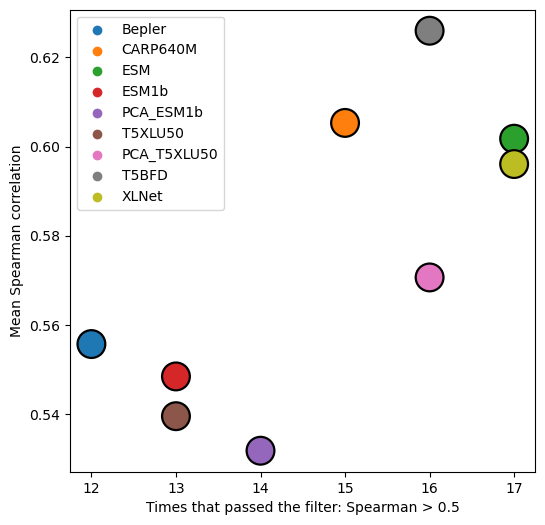

In [20]:
plt.figure(figsize=(6,6))
sns.scatterplot(
    data = df_best_plm, x = "times_spearman", y = "mean_spearman", hue = "model", s = 400, edgecolor = "black")
plt.legend(loc="upper left")
#plt.title("Protein language models comparison using Spearman correlation")
plt.xlabel("Times that passed the filter: Spearman > 0.5")
plt.ylabel("Mean Spearman correlation")

Text(0.5, 0, '')

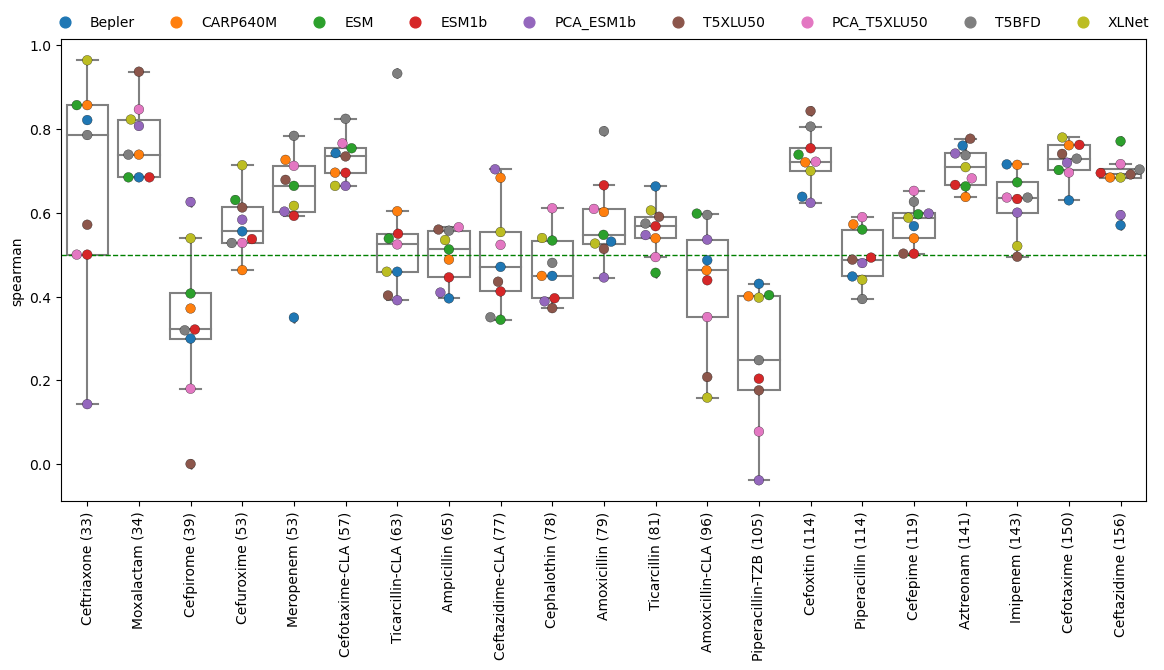

In [21]:
mods = {
    'boxprops':{'facecolor':'none', 'edgecolor':'grey'},
    'medianprops':{'color':'grey'},
    'whiskerprops':{'color':'grey'},
    'capprops':{'color':'grey'}
}

plt.figure(figsize=(14,6))
ax = sns.boxplot(x="anti_lab", y="spearman", data=df_all, color="lightgrey",  **mods)
plt.xticks(rotation = 90)
sns.swarmplot(x="anti_lab", y="spearman", data=df_all, hue="model", s=7, edgecolor="black", linewidth=0.2, ax=ax, alpha = 1)
plt.legend(loc = (-0.015, 1.01), ncol=10 , frameon = False)
plt.axhline(0.5, color='green', linestyle='dashed', linewidth=1)
plt.xlabel("")

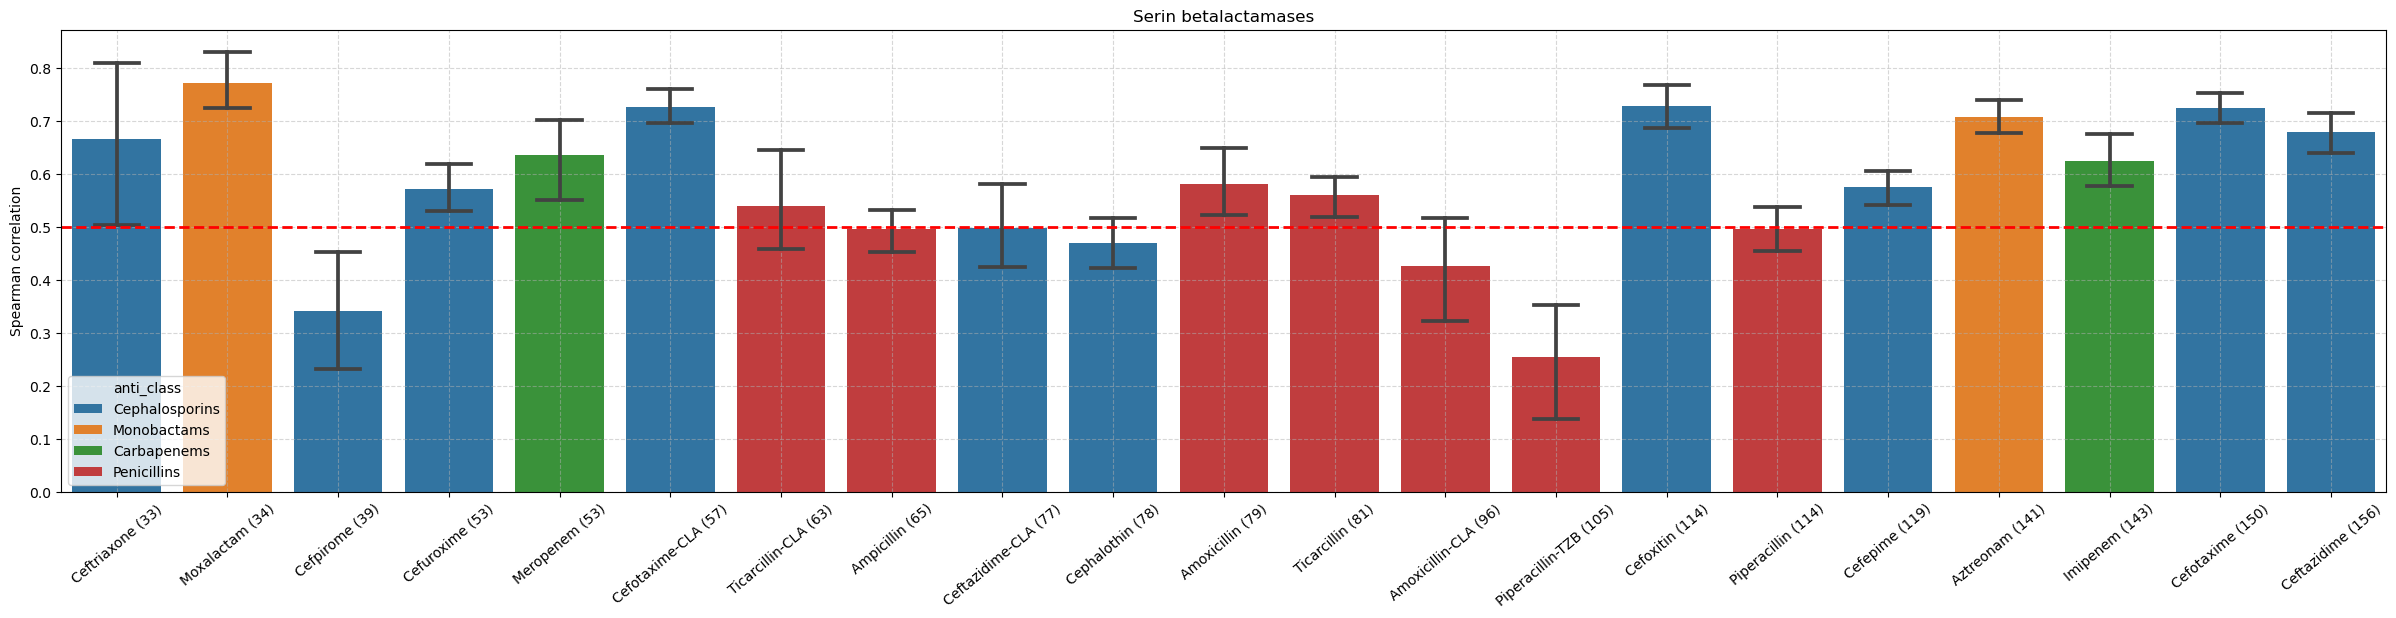

In [22]:
plt.figure(figsize=(30,6))
sns.barplot(
    data = df_all,
    x = "anti_lab", y = "spearman", dodge = False, capsize=.4,
    hue = "anti_class")
plt.xticks(rotation = 40)
plt.grid(linestyle = "--", alpha = 0.5)
plt.ylabel("Spearman correlation")
plt.xlabel("")
plt.title("Serin betalactamases")
plt.axhline(0.5, color='red', linestyle='dashed', linewidth=2)

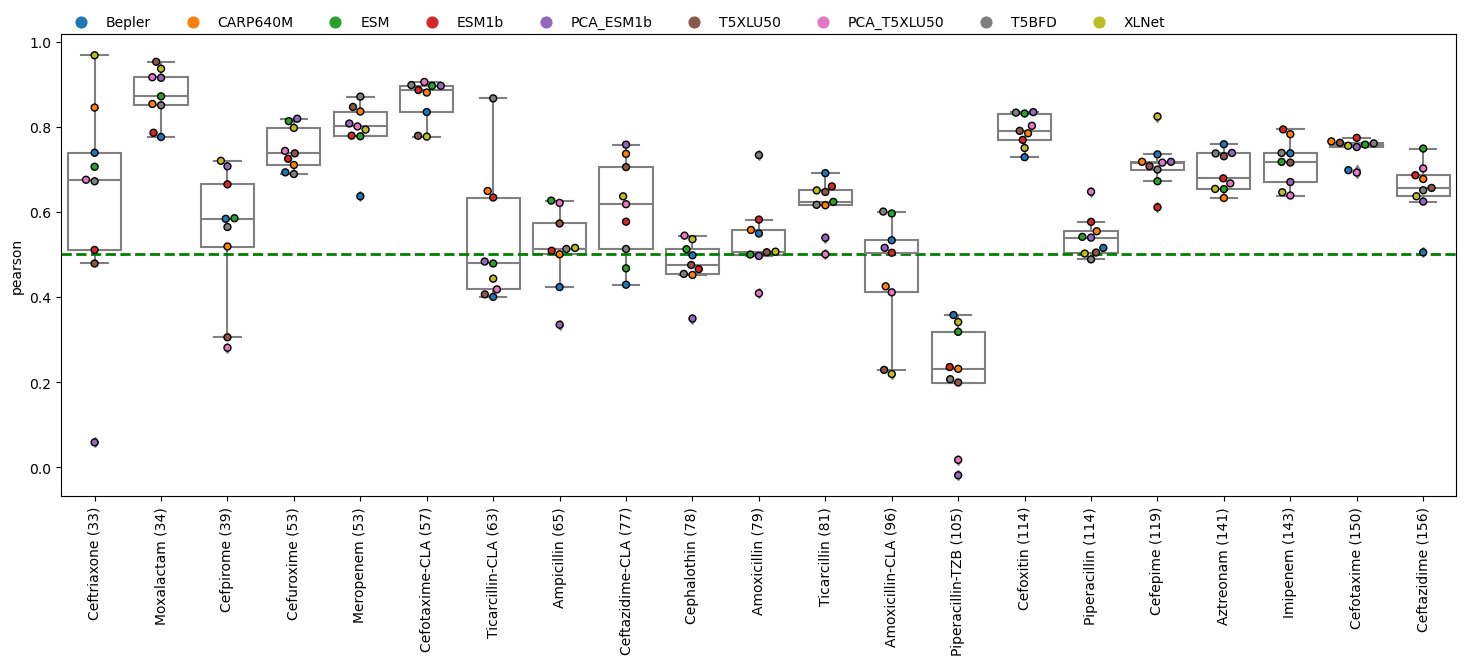

In [23]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(x="anti_lab", y="pearson", data=df_all, color="lightgrey",  **mods)
plt.xticks(rotation = 90)
sns.swarmplot(x="anti_lab", y="pearson", data=df_all, hue="model", s=5, edgecolor="black", linewidth=1, ax=ax, alpha = 1)
plt.legend(loc = (0, 1), ncol=10 , frameon = False)
plt.axhline(0.5, color='green', linestyle='dashed', linewidth=2)
plt.xlabel("");

Fin